In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
_df = pd.read_json('news_data.json', lines = True)
df = _df.drop(_df.columns[[0,4,5]], axis = 1)

In [3]:
df

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...
...,...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...
209523,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr..."
209524,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked..."
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...


In [4]:
target_category = df['category'].unique()
print(target_category)

['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'DIVORCE']


In [5]:
df['category'] = df['category'].astype('string')
df['headline'] = df['headline'].astype('string')
df['short_description'] = df['short_description'].astype('string')

In [6]:
df['category'].iloc[0:5]
df['category'].value_counts().unique()

<IntegerArray>
[35602, 17945, 17362,  9900,  9814,  8791,  6694,  6347,  6340,  5992,  5400,
  5077,  4583,  4320,  3955,  3664,  3653,  3572,  3562,  3484,  3426,  3299,
  2944,  2777,  2622,  2579,  2577,  2254,  2206,  2104,  2096,  1756,  1509,
  1444,  1401,  1398,  1377,  1339,  1144,  1130,  1074,  1014]
Length: 42, dtype: Int64

In [7]:
df['headline'] = df['headline'].str.lower()
df['category'] = df['category'].str.lower()
df['short_description'] = df['short_description'].str.lower()

# df['category'] = df['category'].str.split(',') 
# df


In [30]:
for index, row in df.iterrows():
    i = df['category'].at[index]
    
    if(i == "world news"):
        df['category'].at[index] = "worldpost" 
        
 
    if( i=="arts" or i == "arts & culture"):
        df['category'].at[index] = "culture & arts"
        
    if( i=="wellness"):
        df['category'].at[index] = "healthy living"
    
    if( i=="taste"):
        df['category'].at[index] = "food & drink"
   
    if( i=="parenting"):
        df['category'].at[index] = "parents"
   


    
# check that the species were converted correctly
df['category'].unique()

array(['u.s. news', 'comedy', 'parents', 'worldpost', 'culture & arts',
       'tech', 'sports', 'entertainment', 'politics', 'weird news',
       'environment', 'education', 'crime', 'science', 'healthy living',
       'business', 'style & beauty', 'food & drink', 'media',
       'queer voices', 'home & living', 'women', 'black voices', 'travel',
       'money', 'religion', 'latino voices', 'impact', 'weddings',
       'college', 'style', 'green', 'good news', 'fifty', 'divorce'],
      dtype=object)

In [31]:
# df['categoryId'] = df['category'].factorize()[0]
# df.head()
df

,headline,category,short_description,text
0,over 4 million americans roll up sleeves for o...,u.s. news,health experts said early predict whether dema...,over 4 million americans roll up sleeves for o...
1,american airlines flyer charged banned for lif...,u.s. news,subdued passengers crew fled back aircraft con...,american airlines flyer charged banned for lif...
2,23 of the funniest tweets about cats and dogs ...,comedy,"""until dog understand could eaten.""",23 of the funniest tweets about cats and dogs ...
3,the funniest tweets from parents this week sep...,parents,"""accidentally put grown-up toothpaste toddler’...",the funniest tweets from parents this week sep...
4,woman who called cops on black birdwatcher los...,u.s. news,amy cooper accused investment firm franklin te...,woman who called cops on black birdwatcher los...
...,...,...,...,...
209522,rim ceo thorsten heins significant plans for b...,tech,verizon wireless at&t already promoting lte de...,rim ceo thorsten heins significant plans for b...
209523,maria sharapova stunned by victoria azarenka i...,sports,"afterward, azarenka, effusive press normal, cr...",maria sharapova stunned by victoria azarenka i...
209524,giants over patriots jets over colts among mo...,sports,"leading super bowl xlvi, talked game could end...",giants over patriots jets over colts among mo...
209525,aldon smith arrested 49ers linebacker busted f...,sports,correction: earlier version story incorrectly ...,aldon smith arrested 49ers linebacker busted f...


In [32]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from nltk.tokenize import sent_tokenize
# print(stopwords.words('english'))

def remove_stopword(text):
    stop_word = set(stopwords.words('english'))
#     words = word_tokenize(text)
    return  " ".join([x for x in text.split() if x not in stop_word])


df['short_description'] = df['short_description'].apply(remove_stopword)
df['category'] = df['category'].apply(remove_stopword)

# df['short_description']




In [33]:
def special_char(text):
    reviews = ''
    
    for x in text:
        if(x == " "):
            reviews += " "
            
        elif(x.isalnum()):
            reviews += x
            

    return reviews

df['headline'] = df['headline'].apply(special_char)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

df['text'] = df.headline + " " + df.short_description

# vec = CountVectorizer(min_df=1, lowercase=False)
# vec.fit_transform(df['headline'])

vec = TfidfVectorizer(min_df=1, lowercase=False)
# vec  = MultiLabelBinarizer()
vec.fit(df[['text']])

TfidfVectorizer(lowercase=False)

In [13]:
# vec.get_feature_names_out()
# vec.vocabulary_

In [14]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
labelEncode = le.fit_transform(df["category"])
print("LabelEncode")
print(labelEncode)
categorical_y = to_categorical(labelEncode)
print("To_Categorical")
print(categorical_y)

LabelEncode
[30 30  3 ... 25 25 25]
To_Categorical
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import MultiLabelBinarizer


def generate_class_weights(class_series, multi_class=True, one_hot_encoded=True):
    if multi_class:
        # If class is one hot encoded, transform to categorical labels to use compute_class_weight   
        if one_hot_encoded:
            class_series = np.argmax(class_series, axis=1)

        # Compute class weights with sklearn method
        class_labels = np.unique(class_series)
        class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=class_series)
        return dict(zip(class_labels, class_weights))
    else:
        # It is neccessary that the multi-label values are one-hot encoded
        mlb = None
        if not one_hot_encoded:
            mlb = MultiLabelBinarizer()
            class_series = mlb.fit_transform(class_series)

        n_samples = len(class_series)
        n_classes = len(class_series[0])

        # Count each class frequency
        class_count = [0] * n_classes
        for classes in class_series:
            for index in range(n_classes):
                if classes[index] != 0:
                    class_count[index] += 1

        # Compute class weights using balanced method
        class_weights = [n_samples / (n_classes * freq) if freq > 0 else 1 for freq in class_count]
        class_labels = range(len(class_weights)) if mlb is None else mlb.classes_
        return dict(zip(class_labels, class_weights))

In [16]:
from sklearn.utils import class_weight
class_weights = generate_class_weights(categorical_y)

class_weights 


{0: 1.3062373367413733,
 1: 0.9990797253480832,
 2: 5.232942057942058,
 3: 1.1086084656084656,
 4: 1.6806529237186172,
 5: 1.5263859546878416,
 6: 1.747368859978317,
 7: 5.903832065370527,
 8: 0.3448039231819902,
 9: 4.145765730114761,
 10: 4.273009075150402,
 11: 0.7096355754250491,
 12: 4.28217862252197,
 13: 2.2831753296284187,
 14: 0.24296788482834994,
 15: 1.385760582010582,
 16: 1.7182794817123175,
 17: 5.297774968394437,
 18: 2.0334530279503107,
 19: 3.4091604295476734,
 20: 0.46967564053708727,
 21: 0.16815026443137224,
 22: 0.9431992617434558,
 23: 2.3230445146626755,
 24: 2.7137287916073047,
 25: 1.179138411322772,
 26: 2.655938648751426,
 27: 0.6099944685434802,
 28: 2.8452878870179252,
 29: 0.6046955266955267,
 30: 4.347484178856728,
 31: 1.6387861249071214,
 32: 2.1557384639127526,
 33: 1.675947848344265,
 34: 0.6273826990448244}

In [17]:
from sklearn.model_selection import train_test_split

x = vec.fit_transform(df['text'])
x.sort_indices()
y=  df['category']
x_train, x_test, y_train, y_test = train_test_split(x, categorical_y, test_size = 0.1, random_state = 2, stratify = categorical_y)
# print(len(x_train))
# print(len(x_test))

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.losses import categorical_crossentropy
from tensorflow.keras import regularizers


def build_ann_model():
    model = Sequential()
    
    model.add(Dense(units=y_test.shape[1] ,activation="relu",input_dim=x_train.shape[1]))
    
    model.add(Dense(
    units=36,
    activation = "relu",
    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-5),
    bias_regularizer=regularizers.L1(1e-5),
    activity_regularizer=regularizers.L1(1e-5)
))
    model.add(Dense(units=y_test.shape[1],activation="softmax"))
    
    optimizer = Adam(learning_rate=0.001)
    
    model.compile(optimizer=optimizer,metrics=["accuracy"],loss=categorical_crossentropy)
    return model

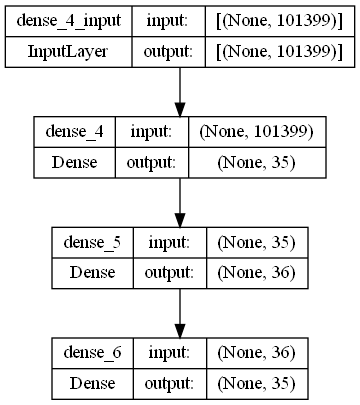

In [22]:
ann_model = build_ann_model()
plot_model(ann_model,show_shapes=True)

In [23]:
ann_history = ann_model.fit(x_train,y_train,epochs=2,batch_size=256,validation_data = [x_test,y_test],class_weight = class_weights)
# ypred = ann_model.predict(x_test)

Epoch 1/2


C:\Users\ALI\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Reshape:0", shape=(None, 35), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


737/737 [==============================] - 28s 36ms/step - loss: 2.5483 - accuracy: 0.4063 - val_loss: 1.8687 - val_accuracy: 0.5154
Epoch 2/2
737/737 [==============================] - 28s 37ms/step - loss: 1.4364 - accuracy: 0.6111 - val_loss: 1.7193 - val_accuracy: 0.5421


In [24]:
y_pred_test = ann_model.predict(x_test)
y_pred_train = ann_model.predict(x_train)

5893/5893 [==============================] - 5s 801us/step


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_pred_test = cont_to_bin(y_pred_test)
y_pred_train = cont_to_bin(y_pred_train)


score_f1_test = f1_score(y_test, y_pred_test,average = 'weighted')
score_f1_train = f1_score(y_train, y_pred_train,average = 'weighted')

score_f1_test_micro = f1_score(y_test, y_pred_test,average = 'micro')
score_f1_train_micro = f1_score(y_train, y_pred_train,average = 'micro')


print("Training Evaluation")
print("Weighted F1-Score: ", score_f1_train)
print("Micro F1-Score: ", score_f1_train_micro)


print('-' * 20)

print("Weighted F1-Score: ", score_f1_test)
print("Micro F1-Score: ", score_f1_test_micro)


Training Evaluation
Weighted F1-Score:  0.7042856468640045
Micro F1-Score:  0.6908481551009152
--------------------
Weighted F1-Score:  0.5702859606730053
Micro F1-Score:  0.5421180737841836


In [272]:
ann_model.save("model/ann3")

INFO:tensorflow:Assets written to: model1/ann1\assets


In [24]:
from tensorflow.keras.models import load_model
ann_model_2 = load_model("model/ann3")

In [26]:
def cont_to_bin(_2darr):
    #make an 2d array
    final2d = np.empty(_2darr.shape,dtype = int)
    
    #iterate over each row
    for i in range(0,_2darr.shape[0]):
        #find greatest element
        row = _2darr[i]
        index = row.argmax()
        
        #make an array
        temp = np.zeros( row.size )
        temp[index] = 1
        final2d[i] = temp
        
    return final2d

# bin_classif = cont_to_bin(ypred_2)
# np.apply_along_axis(function, 1, array)
